## Final Exam Solutions


In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Question 1:

Twenty-four percent of all telephones of a certain type are submitted for service while under warranty. Of these, 70% can be repaired, whereas the other 30% must be replaced with new units. If a company purchases ten of these telephones, what is the probability that exactly three will end up being replaced under warranty?

In [17]:
p_submitted = 0.24
p_repaired = 0.70
p_replaced = 1 - p_repaired

N = 10
k = 3

X_submitted = stats.binom(N,p_submitted)

p_sum = 0.0
for i in range(0,N+1):
    Y = stats.binom(i,p_replaced)
    print ("N_submitted = %0.0f, P_submitted = %0.4f, P_three_replaced = %0.4f" % (i,X_submitted.pmf(i),Y.pmf(k)))
    p_sum = p_sum + Y.pmf(k)*X_submitted.pmf(i)
    
print()
print ("P_three_replaced = %0.4f" % p_sum)

N_submitted = 0, P_submitted = 0.0643, P_three_replaced = 0.0000
N_submitted = 1, P_submitted = 0.2030, P_three_replaced = 0.0000
N_submitted = 2, P_submitted = 0.2885, P_three_replaced = 0.0000
N_submitted = 3, P_submitted = 0.2429, P_three_replaced = 0.0270
N_submitted = 4, P_submitted = 0.1343, P_three_replaced = 0.0756
N_submitted = 5, P_submitted = 0.0509, P_three_replaced = 0.1323
N_submitted = 6, P_submitted = 0.0134, P_three_replaced = 0.1852
N_submitted = 7, P_submitted = 0.0024, P_three_replaced = 0.2269
N_submitted = 8, P_submitted = 0.0003, P_three_replaced = 0.2541
N_submitted = 9, P_submitted = 0.0000, P_three_replaced = 0.2668
N_submitted = 10, P_submitted = 0.0000, P_three_replaced = 0.2668

P_three_replaced = 0.0265


### Question 2:

Consider a paint-drying situation in which drying time for a test specimen is normally distributed with 𝜎 = 10. The hypotheses Ho: 𝜇 = 74 and Ha: 𝜇 < 74 are to be tested using a random sample of n = 25 observations.

(a) How many standard deviations (of  $\bar{X}$ ) below the null value is x = 72.3? (Give answer accurate to 2 decimal places.)

(b) If x = 72.3, what is the conclusion using 𝛼 = .01? (Give answer accurate to 2 decimal places.

Ho is rejected if z ≤ ?  and z = ?  so 

(c) What is 𝛼 for the test procedure that rejects Ho when z ≤ -2.82? (Give answer accurate to 4 decimal places.)

(d) For the test procedure of part (c), what is 𝛽(70)? (Give answer accurate to 2 decimal places.) 

(e) If the test procedure of part (c) is used, what n is necessary to ensure that 𝛽(70) = .01? (Exact answer required.) 

(f) If a level .01 test is used with n = 100, what is the probability of a type I error when 𝜇 = 76? (Give answer accurate to 4 decimal places.)
  

In [49]:
sigma = 10.0
mu = 74.0
n = 25

xbar = 72.3
z = (xbar - mu)/(sigma/np.sqrt(n))
print ("a) %0.2f" % np.abs(z))

alpha = 0.01
X = stats.norm()
z_low = X.ppf(alpha)

print ("b) H_0 is rejected if z <= %0.2f, and z = %0.2f, so fail to reject" %(z_low,z))

z_critical = -2.82
alpha_critical = X.cdf(z_critical)
print ("c) alpha = %0.4f" % alpha_critical)

mu_true = 70.0
xbar_critical = mu + z_critical*sigma/np.sqrt(n)
z_beta = (xbar_critical - mu_true)/(sigma/np.sqrt(n))
beta = 1-X.cdf(z_beta)
print ("d) beta = %0.2f" % (beta))

for n in range(100,200):
    xbar_critical = mu + z_critical*sigma/np.sqrt(n)
    z_beta = (xbar_critical - mu_true)/(sigma/np.sqrt(n))
    beta = 1 - X.cdf(z_beta)
    if (beta < 0.01):
        print ("e) Required n = %0.0f" % n)
        break
        
alpha = 0.01
n = 100
z_critical = X.ppf(alpha)
xbar_critical = mu + z_critical*sigma/np.sqrt(n)

mu_true = 76.0
z_beta = (xbar_critical - mu_true)/(sigma/np.sqrt(n))
alpha_I = X.cdf(z_beta)
print ("f) %0.4f" % alpha_I)


a) 0.85
b) H_0 is rejected if z <= -2.33, and z = -0.85, so fail to reject
c) alpha = 0.0024
d) beta = 0.79
e) Required n = 166
f) 0.0000


### Question 3

A random sample of 115 lightning flashes in a certain region resulted in a sample average radar echo duration of 0.80 sec and a sample standard deviation of 0.32 sec. Calculate a 99% (two-sided) confidence interval for the true average echo duration 𝜇. (Give answers accurate to 3 decimal places.) 

Interpret the resulting interval.

In [51]:
n = 115
xbar = 0.80
s = 0.32
alpha = 0.01

v = n - 1
sem = s/np.sqrt(n)

# Since we only know s, use the t-distribution

X = stats.t(v)

t_min = X.ppf(alpha/2.0)
t_max = X.ppf(1-alpha/2.0)

mu_max = xbar + t_max*sem
mu_min = xbar + t_min*sem

print ("Confidence interval = (%0.3f,%0.3f)" % (mu_min,mu_max))

Confidence interval = (0.722,0.878)


### Question 4

Let X1, X2, . . . , X100 denote the actual net weights of 100 randomly selected 50-lb bags of fertilizer. (Give answers accurate to 3 decimal places.)

(a) Suppose that the true average weight of the bags really is 50 lbs. and the variance of X is 0.9, calculate P(49.9 <= X <= 50.1). 

(b) Suppose that the true average weight of the bags is actually 49.8 lb rather than 50 lb so that on average bags are underfilled, calculate P(49.9 <= X <= 50.1).

In [62]:
n = 100
sigma2 = 0.9
x_min = 49.9
x_max = 50.1

sem = np.sqrt(sigma2/n)
X = stats.norm()

# part A
mu = 50.0
z_min = (x_min-mu)/sem
z_max = (x_max-mu)/sem
prob = X.cdf(z_max)-X.cdf(z_min)

print ("a) P(49.9 <= X <= 50.1) = %0.3f" % prob)

# part B
mu = 49.8
z_min = (x_min-mu)/sem
z_max = (x_max-mu)/sem
prob = X.cdf(z_max)-X.cdf(z_min)

print ("a) P(49.9 <= X <= 50.1) = %0.3f" % prob)

a) P(49.9 <= X <= 50.1) = 0.708
a) P(49.9 <= X <= 50.1) = 0.145


### Question 5

An experiment to compare the tension bond strength of polymer latex modified mortar (Portland cement mortar to which polymer latex emulsions have been added during mixing) to that of unmodified mortar resulted in x = 18.46 kgf/cm2 for the modified mortar (m = 40) and y = 16.12 kgf/cm2 for the unmodified mortar (n = 34). Let 𝜇1 and 𝜇 2 be the true average tension bond strengths for the modified and unmodified mortars, respectively. Assume that the bond strength distributions are both normal.

(a) Assuming that 𝜎1 = 1.8 and 𝜎2 = 1.4, test Ho: 𝜇1 − 𝜇2 = 0 versus Ha: 𝜇1 − 𝜇2 > 0 at level .01.


(b) Compute the probability of a type II error for the test of part (a) when 𝜇1 − 𝜇2 = 1.  

(c) Suppose the investigator decided to use a level .05 test and wished 𝛽 = .10 when 𝜇1 − 𝜇2 = 1. If m = 39, what value of n is necessary? (Exact answer required.)

In [76]:
xbar1 = 18.46
n1 = 40
xbar2 = 16.12
n2 = 34
sigma1 = 1.8
sigma2 = 1.4

X = stats.norm()

# part A
alpha = 0.01
mu1_minus_mu2 = 0.0
sem = np.sqrt(sigma1**2/n1+sigma2**2/n2)

z = ((xbar1-xbar2)-(mu1_minus_mu2))/sem
z_critical = X.ppf(1-alpha)

if (z>z_critical):
    mystring = "Reject H0"
else:
    mystring = "Fail to reject H0"

print ("a) z = %0.2f, therefore %s" % (z,mystring))

# part B
mu1_minus_mu2 = 1.0
z_actual = z_critical - mu1_minus_mu2/sem
beta = X.cdf(z_actual)
print ("b) beta = %0.3f" % beta)

# part C
mu1_minus_mu2 = 1.0
alpha = 0.05
z_critical = X.ppf(1-alpha)

for n in range(1,100):
    sem = np.sqrt(sigma1**2/n1+sigma2**2/n)
    z_actual = z_critical - mu1_minus_mu2/sem
    beta = X.cdf(z_actual)
    if (beta<0.10):
        print ("c) n = %0.0f" % n)
        break


a) z = 6.28, therefore Reject H0
b) beta = 0.360
c) n = 55


### Question 6

The following partial ANOVA table is taken from an article in which the abilities of three different groups to identify a perceptual incongruity were assessed and compared. All individuals in the experiment had been hospitalized to undergo psychiatric treatment. There were 21 individuals in the depressive group, 35 individuals in the functional "other" group, and 31 individuals in the brain-damaged group. Complete the ANOVA table and carry out the F test at level 𝛼 = .01. (Give answers to 2 decimal places and the p-value to 3 decimal places.)

In [78]:
a = 3
N = 21 + 35 + 31
SS_total = 1124.59
MS_treatment = 76.47

dof_treatment = a - 1
dof_total = N - 1
dof_error = v_total - v_treatment

SS_treatment = MS_treatment*dof_treatment
SS_error = SS_total - SS_treatment
MS_error = SS_error/dof_error
fSN = MS_treatment/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.01

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

# print table

print ("Source     df     Sum of Squares     Mean Square     f     P-value")
print ("Groups     %0.0f       %0.2f           %0.2f       %0.2f    %0.3f" %(dof_treatment,SS_treatment,MS_treatment,fSN,pvalue))
print ("Error      %0.0f      %0.2f          %0.2f" %(dof_error,SS_error,MS_error))
print ("Total      %0.0f      %0.2f" %(dof_total,SS_total))

F Signal/Noise = 6.61 
Critical F-value = 4.87
Pvalue = 0.002
Source     df     Sum of Squares     Mean Square     f     P-value
Groups     2       152.94           76.47       6.61    0.002
Error      84      971.65          11.57
Total      86      1124.59


### Question 7

An article gives adaptation scores for three different treatments: 
    
(1) no shock, (2) shock following each stuttered word, (3) shock during each moment of stuttering. 

These treatments were used on each of 21 stutterers, 
resulting in SST = 3464.00, SSTr = 27.67, and SSB1 = 2964.79.

(a) Construct the ANOVA table and test at level .05 to see whether true average 
adaptation score depends on the treatment given. 
Give answers accurate to 2 decimal places.

(b) Judging from the F ratio for subjects (factor B), do you think that blocking on subjects was effective in this experiment? Explain.

In [94]:
N = 3*21
a = 3
b = 21
n = 1

dof_total = N - 1
dof_A = a - 1
dof_B = b - 1
dof_error = dof_total - dof_A - dof_B

SS_total = 3464.0
SS_A = 27.67
SS_B = 2964.79
SS_error = SS_total - SS_A - SS_B

MS_A = SS_A/dof_A
MS_B = SS_B/dof_B
MS_error = SS_error/dof_error

fSN_A = MS_A/MS_error
fSN_B = MS_B/MS_error

print ("F Signal/Noise A = %0.2f " % fSN_A)

alpha = 0.05

fdist = stats.f(dof_A,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value A = %0.2f" % (fhigh))

if (fSN_A > 1):
    pvalue_A = (1-fdist.cdf(fSN_A))
else:
    pvalue_A = fdist.cdf(fSN_A)
    
print ("Pvalue A = %0.3f" % (pvalue_A))

print ("F Signal/Noise B = %0.2f " % fSN_B)

fdist = stats.f(dof_B,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value B = %0.2f" % (fhigh))

if (fSN_B > 1):
    pvalue_B = (1-fdist.cdf(fSN_B))
else:
    pvalue_B = fdist.cdf(fSN_B)
    
print ("Pvalue B = %0.3f" % (pvalue_B))

# print table
print ()
print ("Source     df     Sum of Squares     Mean Square     f     P-value")
print ("Treatments    %0.0f        %0.2f            %0.2f        %0.2f    %0.3f" %(dof_A,SS_A,MS_A,fSN_A,pvalue_A))
print ("Subjects     %0.0f      %0.2f           %0.2f       %0.2f    %0.3f" %(dof_B,SS_B,MS_B,fSN_B,pvalue_B))
print ("Error        %0.0f       %0.2f            %0.2f" %(dof_error,SS_error,MS_error))
print ("Total        %0.0f      %0.2f" %(dof_total,SS_total))

F Signal/Noise A = 1.17 
Critical F-value A = 3.23
Pvalue A = 0.320
F Signal/Noise B = 12.57 
Critical F-value B = 1.84
Pvalue B = 0.000

Source     df     Sum of Squares     Mean Square     f     P-value
Treatments    2        27.67            13.84        1.17    0.320
Subjects     20      2964.79           148.24       12.57    0.000
Error        40       471.54            11.79
Total        62      3464.00


### Question 8

In an experiment to assess the effects of curing time (factor A) 
and type of mix (factor B) on the compressive strength of hardened cement cubes, three different curing times were used in combination with four different mixes, with three observations obtained for each of the 12 curing time-mix combinations. The resulting sums of squares were computed to be SSA = 30,382.4, SSB = 34,528.2, SSE = 95,488.7, and SST = 206,796.2.

(a) Construct an ANOVA table. (Give df as exact integers, SS and MS to 1 decimal place, F to 2 decimal places, and p-values to 3 decimal places.)

(b) Test at level .05 the null hypothesis HoAB: all 𝛾ij's = 0 (no interaction of factors) against HaAB: at least one 𝛾ij ≠ 0.

(c) Test at level .05 the null hypothesis HoA: 𝛼1 = 𝛼2 = 𝛼3 = 0 (factor A main effects are absent) against HaA: at least one 𝛼i ≠ 0.

(d) Test HoB: 𝛽1 = 𝛽2 = 𝛽3 = 𝛽4 = 0 versus HaB: at least one 𝛽j ≠ 0 using a level .05 test.

(e) The values of the xi..'s were x1.. = 4010.88, x2.. = 4029.10, and x3.. = 3960.02. Use Tukey's procedure to investigate significant differences among the three curing times. (Give answer accurate to 2 decimal places.)

F Signal/Noise A = 3.82 
Critical F-value A = 3.40
Pvalue A = 0.036
F Signal/Noise B = 2.89 
Critical F-value B = 3.01
Pvalue B = 0.056
Critical F-value AB = 2.51
Pvalue B = 0.115

Source     df     Sum of Squares     Mean Square     f     P-value
A             2      30382.4           15191.2     3.82    0.0363
B             3      34528.2           11509.4     2.89    0.0561
B             6      46396.9            7732.8     1.94     0.115
Error        24      95488.7            3978.7
Total        35     206796.2

Standard Error = 18.209
Original Xbar =  [4010.88 4029.1  3960.02]
Sorted Xbar =  [3960.02 4010.88 4029.1 ]
q_tukey: calculating k =  2
q_critical =  2.9058174025748973
q_tukey: calculating k =  3
q_critical =  3.5302035366602835
[2.9058174  3.53020354]
W = 64.28
[4010.88, 4029.1, 3960.02]
i j xbar1 xbar2 Diff Diff_comp Result
3 1 3960.0 4010.9 2.793  2.906 No
3 2 3960.0 4029.1 3.794  3.530 Yes
1 2 4010.9 4029.1 1.001  2.906 No


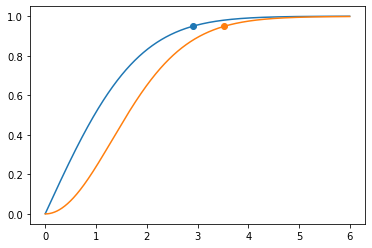

In [110]:
a = 3
b = 4
n = 3
N = a*b*n

dof_total = N - 1
dof_A = a - 1
dof_B = b - 1
dof_AB = dof_A*dof_B
dof_error = dof_total - dof_A - dof_B - dof_AB

SS_total = 206796.2
SS_A = 30382.4
SS_B = 34528.2
SS_error = SS_error = 95488.7
SS_AB = SS_total - SS_A - SS_B - SS_error

MS_A = SS_A/dof_A
MS_B = SS_B/dof_B
MS_AB = SS_AB/dof_AB
MS_error = SS_error/dof_error

fSN_A = MS_A/MS_error
fSN_B = MS_B/MS_error
fSN_AB = MS_AB/MS_error

print ("F Signal/Noise A = %0.2f " % fSN_A)

alpha = 0.05

fdist = stats.f(dof_A,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value A = %0.2f" % (fhigh))

if (fSN_A > 1):
    pvalue_A = (1-fdist.cdf(fSN_A))
else:
    pvalue_A = fdist.cdf(fSN_A)
    
print ("Pvalue A = %0.3f" % (pvalue_A))

print ("F Signal/Noise B = %0.2f " % fSN_B)

fdist = stats.f(dof_B,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value B = %0.2f" % (fhigh))

if (fSN_B > 1):
    pvalue_B = (1-fdist.cdf(fSN_B))
else:
    pvalue_B = fdist.cdf(fSN_B)
    
print ("Pvalue B = %0.3f" % (pvalue_B))

fdist = stats.f(dof_AB,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value AB = %0.2f" % (fhigh))

if (fSN_AB > 1):
    pvalue_AB = (1-fdist.cdf(fSN_AB))
else:
    pvalue_AB = fdist.cdf(fSN_AB)
    
print ("Pvalue B = %0.3f" % (pvalue_AB))

# print table
print ()
print ("Source     df     Sum of Squares     Mean Square     f     P-value")
print ("A             %0.0f      %0.1f           %0.1f     %0.2f    %0.4f" %(dof_A,SS_A,MS_A,fSN_A,pvalue_A))
print ("B             %0.0f      %0.1f           %0.1f     %0.2f    %0.4f" %(dof_B,SS_B,MS_B,fSN_B,pvalue_B))
print ("B             %0.0f      %0.1f            %0.1f     %0.2f     %0.3f" %(dof_AB,SS_AB,MS_AB,fSN_AB,pvalue_AB))
print ("Error        %0.0f      %0.1f            %0.1f" %(dof_error,SS_error,MS_error))
print ("Total        %0.0f     %0.1f" %(dof_total,SS_total))
print ()

xbar = np.array([4010.88,4029.10,3960.02])
n = N/a

# Tukey's Procedure
#
# Step 1:  Calculate the standard error = sqrt(MS_error/n)

from q_tukey import q_tukey

std_error = np.sqrt(MS_error/n)
print ("Standard Error = %0.3f" % std_error)

# Step 2:  Order the means from smallest to largest

print ("Original Xbar = ",xbar)
xbar_orig = xbar.copy()
xbar.sort()
print ("Sorted Xbar = ",xbar)

# Step 3:  Get the expected number of error bars (sem) between largest and smallest, for the number
# of means to be compared (a).  For this, we need the studentized range table values q(alpha,dof_error,k) for k=2..a.
# 
# http://www.real-statistics.com/statistics-tables/studentized-range-q-table/
# For this problem, dof_error = 15, alpha = 0.05, k = 2,3,4,5
#q = np.array([3.014,3.673,4.076,4.367])

n_means=len(xbar)
q = q_tukey(n_means,dof_error,alpha)
print (q)

# Step 4:  Calculate W = q(k=5)*std_error

W = q[n_means-2]*std_error

print ("W = %0.2f" % W)

# Step 5:  Make pair-wise comparisons

print (list(xbar_orig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xbar)):
    for j in range(len(xbar)):
        if (xbar[j] > xbar[i]):
            diff = (xbar[j] - xbar[i])/std_error
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xbar_orig).index(xbar[i])+1
            jorig = list(xbar_orig).index(xbar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xbar[i],xbar[j],diff,diff_comp,Result))

### Question 9

The current (in µA) necessary to produce a certain level of brightness of a television tube was measured for two different types of glass and three different types of phosphor, resulting in the accompanying data ("Fundamentals of Analysis of Variance," Industrial Quality Control, 1956: 5-8).

Phosphor Type
1	2	3
Glass  	  1  	  280, 290, 285  	  300, 310, 295  	  270, 285, 290  
Type	2	230, 235, 240	260, 240, 235	220, 225, 230

Assuming that both factors are fixed, test HoAB versus HaAB at level .01. Then if HoAB cannot be rejected, test the two sets of main effect hypotheses. (Give answers accurate to 2 decimal places.)   


In [123]:
xijk = np.array([[280,1,1],[290,1,1],[285,1,1],
                [300,1,2],[310,1,2],[295,1,2],
                [270,1,3],[285,1,3],[290,1,3],
                [230,2,1],[235,2,1],[240,2,1],
                [260,2,2],[240,2,2],[235,2,2],
                [220,2,3],[225,2,3],[230,2,3]])

df = pd.DataFrame(xijk,columns=['value','Glass','Phosphor'])
formula = 'value ~ C(Glass):C(Phosphor) + C(Glass) + C(Phosphor)'
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print (anovaResults)
print ()

dof_AB = 2
dof_A = 1
dof_B = 2
dof_error = 12
alpha = 0.01

fdist = stats.f(dof_AB,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value AB = %0.2f" % (fhigh))

fdist = stats.f(dof_A,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value A = %0.2f" % (fhigh))

fdist = stats.f(dof_B,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value B = %0.2f" % (fhigh))

                        df        sum_sq       mean_sq       F        PR(>F)
C(Glass)               1.0  13338.888889  13338.888889  192.08  9.568328e-09
C(Phosphor)            2.0   1244.444444    622.222222    8.96  4.162152e-03
C(Glass):C(Phosphor)   2.0     44.444444     22.222222    0.32  7.321584e-01
Residual              12.0    833.333333     69.444444     NaN           NaN

Critical F-value AB = 6.93
Critical F-value A = 9.33
Critical F-value B = 6.93
